<a href="https://colab.research.google.com/github/zszazi/MSD/blob/master/SIFT_feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

In [0]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sift_crop.jpg to sift_crop.jpg
Saving sift_image.jpg to sift_image.jpg
User uploaded file "sift_crop.jpg" with length 3761 bytes
User uploaded file "sift_image.jpg" with length 67621 bytes


-----------------------IMAGE-----------------------


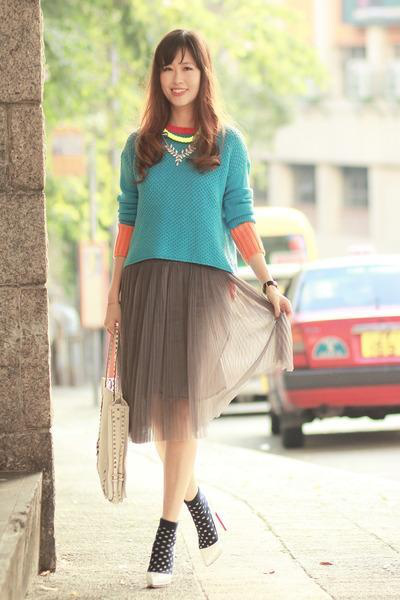


-----------------------TEMPLATE-----------------------


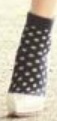

In [3]:
img = cv2.imread('sift_image.jpg',1)

template = cv2.imread('sift_crop.jpg',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE-----------------------')
cv2_imshow(template)

initiate SIFT detector

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template,None)

In [0]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

In [28]:
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img,kp1,template,kp2,good,None,flags=2)

%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


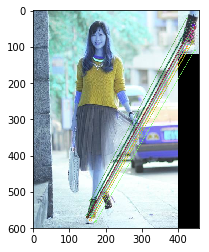

In [29]:
plt.imshow(img3)
plt.show()

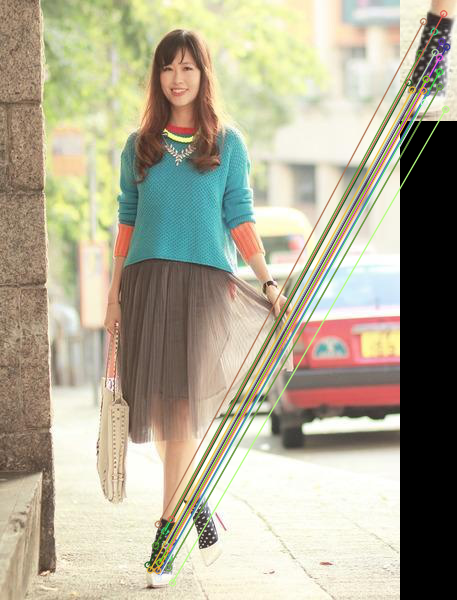

In [26]:
cv2_imshow(img3)